<a href="https://colab.research.google.com/github/Akanerd/Orbit-Archieve/blob/main/Day%20-%2014%20-%20FGD%20Live%20Code%20Sesi%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KNN**

**Import Library**

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9beb97ba10>]],
      dtype=object)

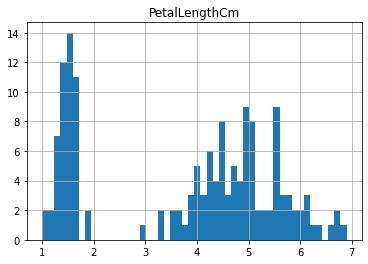

In [4]:
df.hist(column='PetalLengthCm',bins=50)

In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
X=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
y = df['Species'].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [8]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 4)
print("Train set : ", X_train.shape,y_train.shape)
print("Test set : ", X_test.shape,y_test.shape)
y_test[0:5]

Train set :  (120, 4) (120,)
Test set :  (30, 4) (30,)


array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

# **KNN Method**

In [10]:
from sklearn.neighbors import KNeighborsClassifier as KNNC

In [11]:
k = 4
knn = KNNC(n_neighbors=k).fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=4)

**Prediction**

In [12]:
yhat = knn.predict(X_test)
yhat[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

**Accuray**

In [13]:
from sklearn import metrics
print("Train Accuracy : ", metrics.accuracy_score(y_train,knn.predict(X_train)))
print("Test Accuracy : ", metrics.accuracy_score(y_test,yhat))

Train Accuracy :  0.9666666666666667
Test Accuracy :  0.9333333333333333


In [14]:
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx= []

for n in range(1,Ks):
  neighbor = KNNC(n_neighbors=n).fit(X_train,y_train)
  yhat = neighbor.predict(X_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)
  std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.9       , 0.93333333, 0.9       , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333, 0.93333333])

<function matplotlib.pyplot.show>

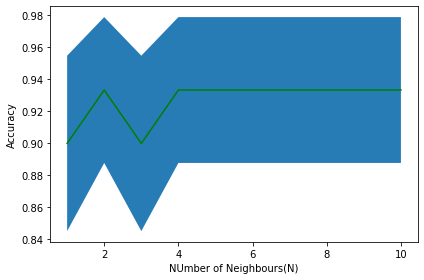

In [15]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=10)
plt.ylabel('Accuracy')
plt.xlabel('NUmber of Neighbours(N)')
plt.tight_layout()
plt.show